In [33]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures

X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)



# Linear Regresion 

In [13]:
lr = LinearRegression()

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        lr, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss:' ,avg_expected_loss)
print('Average bias:', avg_bias)
print('Average variance:',avg_var)

Average expected loss: 29.891450216347593
Average bias: 28.609233801954325
Average variance: 1.2822164143932582


In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred2=lr.predict(X_train)

print('r2 score on ',r2_score(y_test,y_pred))
print('r2 score on traing data ',r2_score(y_train,y_pred2))

r2 score on  0.6485645742370708
r2 score on traing data  0.7647156501433012


# Ridge 

In [15]:

lr = Ridge(alpha=0.1)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        lr, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: ', avg_expected_loss)
print('Average bias: ' , avg_bias)
print('Average variance: ' , avg_var)

Average expected loss:  29.994008584056317
Average bias:  28.72939649273625
Average variance:  1.2646120913200667


In [16]:
model = Ridge(alpha=5) 
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print('Mean Square error',mean_squared_error(y_test,y_pred))
print('r2_score',r2_score(y_test,y_pred))

Mean Square error 29.61069396794522
r2_score 0.6336583809507104


# Lasso 

In [28]:
lr = Lasso(alpha=.0001)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        lr, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 29.895
Average bias: 28.613
Average variance: 1.282


In [29]:
model = Lasso(alpha=1.3) 
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

print('Mean Square error',mean_squared_error(y_test,y_pred))
print('r2_score',r2_score(y_test,y_pred))
print('r2_score on traing data ',r2_score(y_train,y_pred2))

Mean Square error 30.079802179000477
r2_score 0.6278546040539805
r2_score on traing data  0.6893496246108772


# Discison Tree

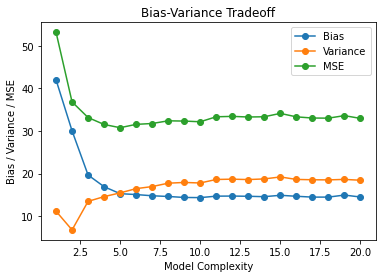

In [20]:
complexities = range(1, 21)
bias_list = []
variance_list = []
mse_list = []

# Calculate bias, variance, and MSE for different complexities
for complexity in complexities:
    model = DecisionTreeRegressor(max_depth=complexity)  
    mse, bias, variance = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)
    bias_list.append(bias)
    variance_list.append(variance)
    mse_list.append(mse)

plt.plot(complexities, bias_list, label='Bias', marker='o')
plt.plot(complexities, variance_list, label='Variance', marker='o')
plt.plot(complexities, mse_list, label='MSE', marker='o')

plt.xlabel('Model Complexity')
plt.ylabel('Bias / Variance / MSE')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

In [30]:
model = DecisionTreeRegressor(max_depth=5) 


avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
print('Average expected loss',avg_expected_loss)
print('Average bias:' ,avg_bias)
print('Average variance:', avg_var)

Average expected loss 30.934719279122586
Average bias: 15.44448858587779
Average variance: 15.490230693244795


In [24]:
model = DecisionTreeRegressor(max_depth=6) 
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [25]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)
print('Mean Square error',mean_squared_error(y_test,y_pred))
print('r2_score',r2_score(y_test,y_pred))
print('r2_score on train data ',r2_score(y_train,y_pred2))

Mean Square error 15.41545207621795
r2_score 0.8092810091485234
r2_score on train data  0.9420981673593922


In [27]:
import numpy as np 
kfold = KFold(n_splits=6, shuffle=True, random_state=42)
model = DecisionTreeRegressor(max_depth=5) 
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
np.mean(scores)


0.7892242602529151

# Applying polynomial 

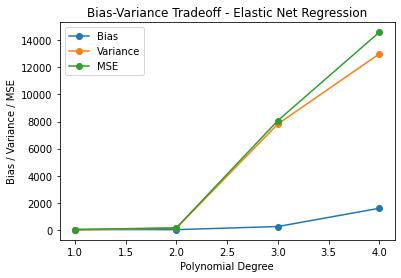

In [35]:
degrees = range(1, 5)
bias_list = []
variance_list = []
mse_list = []

for degree in degrees:
    # Apply polynomial 
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)

    # applying linear regression 
    model = LinearRegression()
    mse, bias, variance = bias_variance_decomp(model, X_train_poly, y_train, X_test_poly, y_test, loss='mse', random_seed=123)
    bias_list.append(bias)
    variance_list.append(variance)
    mse_list.append(mse)
plt.plot(degrees, bias_list, label='Bias', marker='o')
plt.plot(degrees, variance_list, label='Variance', marker='o')
plt.plot(degrees, mse_list, label='MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Bias / Variance / MSE')
plt.title('Bias-Variance Tradeoff - Elastic Net Regression')
plt.legend()
plt.show()



# Elastic Net 

In [32]:
model = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=123)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', random_seed=22)

print('Average expected loss',avg_expected_loss)
print('Average bias:' ,avg_bias)
print('Average variance:', avg_var)

Average expected loss 29.14002494004275
Average bias: 28.262437859529435
Average variance: 0.8775870805133246


# Ridge with polynomial transformtion

In [56]:
### aplying elastic net with polynomial regression 
from sklearn.preprocessing import StandardScaler 

#scaing the data 
sclae=StandardScaler()
X_train_std=sclae.fit_transform(X_train)
X_test_std=sclae.transform(X_test)

# aplying polynomial
polynomial_features = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = polynomial_features.fit_transform(X_train_std)
X_test_poly = polynomial_features.transform(X_test_std)

model = Ridge(alpha=1.5)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train_poly, y_train, X_test_poly, y_test, loss='mse', random_seed=22)

print('Average expected loss',avg_expected_loss)
print('Average bias:' ,avg_bias)
print('Average variance:', avg_var)


Average expected loss 21.564388894600988
Average bias: 14.228349166807696
Average variance: 7.336039727793293


In [58]:
model.fit(X_train_poly,y_train)
y_pred=model.predict(X_test_poly)
print('r2_score',r2_score(y_test,y_pred))


r2_score 0.8221538678078824


In [62]:
# linear regression 

lr=LinearRegression()
lr.fit(X_train_poly,y_train)
y_pred=lr.predict(X_test_poly)

print('r2_score',r2_score(y_test,y_pred))


r2_score 0.7665241262664991
